## 최소제곱법 (Least Squared Method) 

: 회귀식의 최적의 1차 함수 그래프를 찾는 수식(기울기를 구함),


1. 시그마[(x-x의 평균)(y-y의 평균)] / 시그마(x-x의 평균)^2



2. y절편 = y의평균 - (x의평균 * 기울기)



In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
x=[2,4,6,8]
y=[81,93,91,97]

mx=np.mean(x)
my=np.mean(y)

mx,my

(5.0, 90.5)

In [116]:
divisor=sum([(mx-i)**2 for i in x])

numerator=sum([(i-mx)*(j-my) for i,j in zip(x,y)])

In [117]:
inclination=numerator/divisor #기울기

In [118]:
b=my-(mx*inclination)
b

79.0

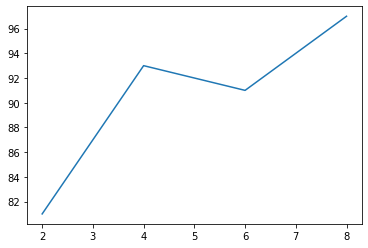

In [119]:
plt.plot(x,y)

In [120]:
y_=[2*x+b for x in range(len(x)) ]
y_

[79.0, 81.0, 83.0, 85.0]

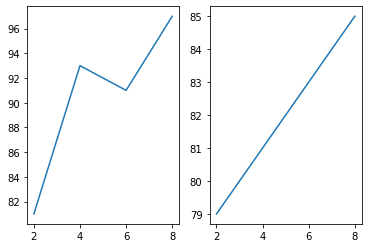

In [121]:
plt.subplot(1,2,1)
plt.plot(x,y)

plt.subplot(1,2,2)
plt.plot(x,y_)

In [122]:
def lsm(x,y):  #최소제곱법
    mean_x=np.mean(x) #x의 평균
    mean_y=np.mean(y) #y의 평균
    
    numerator=sum([(i-mean_x)*(j-mean_y) for i,j in zip(x,y)])  #(x-x의평균)(y-y의평균) 의 합
    divisor=sum([(mean_x-i)**2 for i in x]) #(x-x의평균)^2 의 합
    
    inclination = numerator/divisor #기울기 
    b=mean_y-(mean_x*inclination) #y절편
    
    return inclination,b
    

In [123]:
lsm(x,y)

(2.3, 79.0)

### 예제

In [124]:
x=[1,2,3,4,5,6,7,8]
y=[0.2,0.3,0.5,0.6,0.9,0.95,1.1,1.5]

np.mean(x),np.mean(y)

(4.5, 0.7562500000000001)

In [125]:
w,b=lsm(x,y)
w,b

(0.17559523809523808, -0.03392857142857131)

In [126]:
new_x=[1.15,22,77,200]
y_predict=[x*w+b for x in new_x]

for i in y_predict:
    if i>=30:
        i=30
    print(round(i,3))


0.168
3.829
13.487
30


In [127]:
#5주차 예상 크기와 실제 크기와의 차이
loss_5=y[4]-(w*5+b)
round(loss_5,3)

0.056

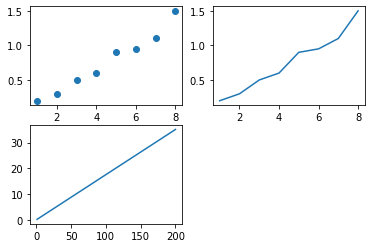

In [128]:
plt.subplot(2,2,1)
plt.scatter(x,y)

plt. subplot(2,2,2)
plt.plot(x,y)

plt.subplot(2,2,3)
plt.plot(new_x,y_predict)

## MSE (평균제곱오차)

1. 임의의 값(w,b)을 주고 그 임의의 값에 따른 그래프의 MSE 최소가 되는 선을 찾는 것이 딥러닝의 목적(최소가 된는 그래프의 w,b를 찾는 것)


2. sum((y-y_predict)^2)/변수개수 : 실제 y값과 y예측값의 차이의 제곱의 합을 변수개수로 나눔

In [145]:
#임의의 기울기,절편
ab=[3,76]

#데이터
data=[[2,81],[4,93],[6,91],[8,97]]



In [146]:
y=[y[1] for y in data]
print(y)

y_predict=[ab[0]*x[0]+ab[1] for x in data]
y_predict

[81, 93, 91, 97]


[82, 88, 94, 100]

In [148]:
y=np.array(y)
y_predict=np.array(y_predict)

y,y_predict

(array([81, 93, 91, 97]), array([ 82,  88,  94, 100]))

In [149]:
y-y_predict

array([-1,  5, -3, -3])

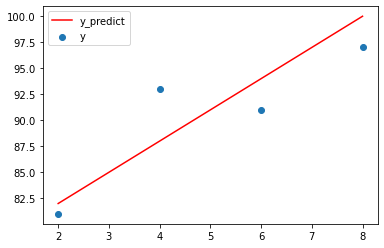

In [162]:
plt.scatter(x,y)
plt.plot(x,y_predict,"r-")
plt.legend(["y_predict","y"])

In [152]:
#평균제곱오차
mse=sum((y-y_predict)**2)/len(y)
mse

11.0

In [153]:
#평균제곱근오차 , 
RMSE=mse**(1/2)
RMSE  #임의로 정한 [3,76]의 오차가 3.31... 이라는 결과가 나옴

3.3166247903554

In [165]:
def rmse(var,data):
    y=[y[1] for y in data]
    y_predict=[var[0]*x[0]+var[1] for x in data]
    
    y=np.array(y)
    y_predict=np.array(y_predict)

    mse=sum((y-y_predict)**2)/len(y)
    RMSE=mse**(1/2)

    return RMSE
    

In [166]:
rmse(ab,data)

3.3166247903554